## Codemonkeys 19/01/2017
### interactive jupyter notebooks with widgets

### Setting up

First install the package:

`pip install ipywidgets`

then activate the plugin for jupyter:

`jupyter nbextension enable --py widgetsnbextension`

(both on the command line). 

If you want to run all the examples you'll need other stuff:

`pip install jupyter folium seaborn pandas scikit-image`

**Important: you have to restart jupyter after enabling the extension**

In a new notebook, import what we need from the module:

In [2]:
from ipywidgets import interact

In [118]:
# minimal example 
# interact() automatically generates the widget based on the type of the argument

# define a function which prints the square of its argument
def print_square(x):
    print("the square of {} is {}".format(x, round(x**2, 5))) #round to ignore floating point errors
    
# call it to make sure it works
print_square(3)
print_square(12)

the square of 3 is 9
the square of 12 is 144


In [114]:
# the first argument to interact is the name of the function
# subsequent arguments are the arguments to the function in keyword style
# interact uses the arguments to figure out what widgets to display

interact(print_square, x=10)

the square of 6 is 36


Because we gave an integer argument, `interact()` automatically creates an integer slider. It looks like for argument value `n` the slider goes from `-n` to `3n`. 



In [5]:
# by giving a tuple we can set (min,max,stepsize)
    
interact(print_square, x=(1,10,0.1))

the square of 4.9 is 24.01


<function __main__.print_square>

In [6]:
# interact automatically generates different controls for different argument types 
# giving a list (not any iterable) generates a drop down 

def print_fruit(fruit):
    print("you have chosen {}".format(fruit))
    
interact(print_fruit, fruit=['apple', 'banana', 'pear'])

you have chosen apple


<function __main__.print_fruit>

In [7]:
# see what happens if we pass a string
interact(print_fruit, fruit="apple")

you have chosen apple


<function __main__.print_fruit>

In [8]:
# multiple arguments will generate multiple widgets
def repeat_fruit(x, fruit):
    print((fruit + ', ') * x)
    
interact(repeat_fruit, x=(1,10), fruit=['apple', 'banana', 'pear'])

apple, apple, apple, apple, apple, 


<function __main__.repeat_fruit>

In [9]:
# in python 3 we can also use this syntax (function annotation)
def repeat_fruit(x:(1,10),fruit:['apple', 'banana', 'pear']):
    print((fruit + ', ') * x)
    
interact(repeat_fruit)
# I will not do this for the rest of the talk as it still looks weird to me :-)

apple, apple, apple, apple, apple, 


<function __main__.repeat_fruit>

In [10]:
# for slow functions it will be unusable to update the output every time we move the slider
# add the  __manual argument to get an explicit button

def repeat_fruit(x, fruit):
    print((fruit + ', ') * x)
    
interact(repeat_fruit, x=(1,10), fruit=['apple', 'banana', 'pear'], __manual=True)

<function __main__.repeat_fruit>

## Example: putting a user interface on a function

In [11]:
# example taken from my talk on building command line interfaces with argparse
# a function that reads dna from a file and finds kmers that make up more than a
# given fraction of the total. Don't worry about the code, just look at the signature

import collections
from tqdm import tqdm

def find_common_kmers(filename, kmer_length, threshold, report):

    dna = open(filename).read().replace("\n", '') 

    all_kmers = []
    for start in tqdm(range(len(dna) - kmer_length + 1)):
        kmer = dna[start:start+kmer_length]
        all_kmers.append(kmer)

    kmer_counts = collections.Counter(all_kmers)
    total_count = len(all_kmers)

    for kmer, count in kmer_counts.items():
        fraction = count / total_count
        if fraction > threshold:
            if report == 'count':
                print(kmer, count)
            elif report == 'fraction':
                print(kmer, fraction)
            


In [12]:
# an example run
find_common_kmers('small.dna', 4, 0.01, 'fraction')

100%|██████████| 6999997/6999997 [00:02<00:00, 2544655.27it/s]

ATTT 0.019971008559003668
GAAA 0.013161434212043233
AATT 0.018285150693636013
AAAA 0.03301787129337341
CAAA 0.010694290297552984
TTTG 0.010571147387634594
TTTC 0.01341772003616573
TTTA 0.010059432882614093
TTTT 0.03351472864916942
AAAT 0.01972143702347301


In [13]:
# now let's use interact
# on multiple lines for readability
interact(
    find_common_kmers, 
    filename='small.dna',
    kmer_length = (1,10),
    threshold = (0.0, 0.1, 0.01),
    report = ['count', 'fraction'],
    __manual = True
)

<function __main__.find_common_kmers>

The interface works fine but looks terrible. There is a whole system for laying out / stying widgets that I will not talk about.

## Interactive dataframes

In [14]:
# set up pandas/seaborn stuff
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# brief digression for pandas
# we can filter rows from a dataframe like this
# it gets displayed as a nice table using jupyter magic
euk = pd.read_csv("eukaryotes.tsv", sep="\t", na_values=['-'])
euk[euk['Group'] == 'Protists']

,Organism/Name,TaxID,BioProject_Accession,BioProject_ID,Group,SubGroup,Size_(Mb),GC%,Assembly_Accession,Chromosomes,...,Plasmids,WGS,Scaffolds,Genes,Proteins,Release_Date,Modify_Date,Status,Center,BioSample_Accession
0,Emiliania_huxleyi_CCMP1516,280463,PRJNA77753,77753,Protists,Other_Protists,167.67600,64.50000,GCA_000372725.1,NaN,...,NaN,AHAL01,7795.0,38549.0,38554.0,2013/04/19,2014/08/01,Scaffold,JGI,SAMN02744062
81,Leishmania_major_strain_Friedlin,347515,PRJNA10724,10724,Protists,Kinetoplasts,32.85510,59.71140,GCA_000002725.2,36.0,...,NaN,NaN,36.0,9686.0,8316.0,1998/06/29,2015/02/27,Complete_Genome,Friedlin_Consortium,SAMEA3138173
82,Leishmania_major_strain_SD_75.1,860570,PRJNA50303,50303,Protists,Kinetoplasts,31.24280,59.50000,GCA_000250755.2,NaN,...,NaN,AFZI01,36.0,NaN,NaN,2012/02/28,2014/08/06,Scaffold,WUGSC,SAMN02953800
83,Leishmania_major_strain_LV39c5,860569,PRJNA50301,50301,Protists,Kinetoplasts,32.32750,59.30000,GCA_000331345.1,NaN,...,NaN,AODR01,849.0,NaN,NaN,2013/01/09,2014/08/04,Scaffold,WUGSC,SAMN01129976
84,Trypanosoma_brucei_gambiense_DAL972,679716,PRJNA260635,260635,Protists,Kinetoplasts,22.14810,47.15250,GCA_000210295.1,11.0,...,NaN,NaN,11.0,9930.0,9822.0,2009/10/14,2015/06/30,Chromosome,NCBI,SAMEA2272188
85,Trypanosoma_cruzi,5693,PRJNA11755,11755,Protists,Kinetoplasts,89.93750,51.70000,GCA_000209065.1,NaN,...,NaN,AAHK01,29495.0,23696.0,19607.0,2005/07/14,2014/08/06,Scaffold,Trypanosoma_cruzi_consortium,SAMN02953627
86,Trypanosoma_cruzi_strain_Esmeraldo,366581,PRJNA50493,50493,Protists,Kinetoplasts,38.08110,50.60000,GCA_000327425.1,NaN,...,NaN,ANOX01,15803.0,NaN,NaN,2012/12/20,2014/08/04,Scaffold,WUGSC,SAMN00016463
87,Trypanosoma_cruzi_JR_cl._4,914063,PRJNA59941,59941,Protists,Kinetoplasts,41.48080,51.20000,GCA_000331405.1,NaN,...,NaN,AODP01,15312.0,NaN,NaN,2013/01/09,2014/08/06,Scaffold,Genome_Sequencing_Center_(GSC)_at_Washington_U...,SAMN02953827
88,Trypanosoma_cruzi_Tula_cl2,1206070,PRJNA169675,169675,Protists,Kinetoplasts,83.51120,51.10000,GCA_000365225.1,NaN,...,NaN,AQHO01,45711.0,NaN,NaN,2013/04/15,2014/08/06,Scaffold,Kinetoplastid_Genomes_Consortium,SAMN02953848
89,Trypanosoma_cruzi_marinkellei,85056,PRJNA77843,77843,Protists,Kinetoplasts,34.22620,50.90000,GCA_000300495.1,NaN,...,NaN,AHKC01,NaN,10117.0,10104.0,2012/10/01,2014/08/06,Contig,Karolinska_Institutet,SAMN02953810


In [16]:
# turn this into a function
def filter_genomes(group):
    return euk[euk['Group'] == group]

filter_genomes('Plants')

,Organism/Name,TaxID,BioProject_Accession,BioProject_ID,Group,SubGroup,Size_(Mb),GC%,Assembly_Accession,Chromosomes,...,Plasmids,WGS,Scaffolds,Genes,Proteins,Release_Date,Modify_Date,Status,Center,BioSample_Accession
1,Arabidopsis_thaliana,3702,PRJNA10719,10719,Plants,Land_Plants,119.668000,36.0528,GCA_000001735.1,5.0,...,NaN,NaN,7.0,33583.0,35378.0,2001/08/13,2016/06/20,Chromosome,The_Arabidopsis_Information_Resource_(TAIR),SAMN03081427
2,Arabidopsis_thaliana,3702,PRJNA30811,30811,Plants,Land_Plants,96.500200,36.7000,GCA_000222325.1,NaN,...,NaN,AFNA01,2143.0,NaN,NaN,2011/07/18,2014/08/11,Scaffold,1001genomes,SAMN02981334
3,Arabidopsis_thaliana,3702,PRJNA30811,30811,Plants,Land_Plants,98.066200,36.6000,GCA_000222345.1,NaN,...,NaN,AFNB01,1740.0,NaN,NaN,2011/07/18,2014/08/11,Scaffold,1001genomes,SAMN02981335
4,Arabidopsis_thaliana,3702,PRJNA30811,30811,Plants,Land_Plants,96.256500,36.6000,GCA_000222365.1,NaN,...,NaN,AFMZ01,1261.0,NaN,NaN,2011/07/18,2014/08/11,Scaffold,1001genomes,SAMN02981333
5,Arabidopsis_thaliana,3702,PRJNA30811,30811,Plants,Land_Plants,96.694000,36.7000,GCA_000222385.1,NaN,...,NaN,AFNC01,2408.0,NaN,NaN,2011/07/18,2014/08/11,Scaffold,1001genomes,SAMN02981336
6,Arabidopsis_thaliana,3702,PRJNA13190,13190,Plants,Land_Plants,93.654500,36.0433,GCA_000211275.1,6.0,...,NaN,NaN,6.0,16842.0,20111.0,2000/12/14,2007/05/19,Chromosome,Arabidopsis_Genome_Initiative,SAMN03081413
7,Solanum_lycopersicum,4081,PRJNA41343,41343,Plants,Land_Plants,540.589000,34.5000,GCA_000181095.1,NaN,...,NaN,BABP01,100783.0,NaN,NaN,2009/11/06,2015/09/25,Scaffold,Kazusa_DNA_Research_Institute,SAMD00036540
8,Solanum_lycopersicum,4081,PRJNA67471,67471,Plants,Land_Plants,0.575198,43.5000,GCA_000325825.1,NaN,...,NaN,AFYB01,195.0,NaN,NaN,2012/02/24,2014/08/11,Contig,Mitochondrial_Genome,SAMN02981358
9,Hordeum_vulgare_subsp._vulgare,112509,PRJEB86,179052,Plants,Land_Plants,1868.640000,44.3000,GCA_000326085.1,NaN,...,NaN,CAJW01,2670738.0,NaN,NaN,2012/10/29,2015/02/01,Scaffold,IPK-Gatersleben,SAMEA2272000
10,Hordeum_vulgare_subsp._vulgare,112509,PRJDA62403,62403,Plants,Land_Plants,28.016000,44.7000,GCA_000227425.1,NaN,...,NaN,BACC01,NaN,NaN,NaN,2011/06/22,2015/09/16,Contig,"Institute_of_Plant_Science_and_Resources,_Okay...",SAMD00036549


In [17]:
# we can use pandas to get a list of the groups in the dataframe
list(euk['Group'].unique())

['Protists', 'Plants', 'Fungi', 'Animals', 'Other']

In [18]:
# use interact to populate a drop down from the dataframe itself
interact(filter_genomes, group=list(euk['Group'].unique()))

,Organism/Name,TaxID,BioProject_Accession,BioProject_ID,Group,SubGroup,Size_(Mb),GC%,Assembly_Accession,Chromosomes,...,Plasmids,WGS,Scaffolds,Genes,Proteins,Release_Date,Modify_Date,Status,Center,BioSample_Accession
0,Emiliania_huxleyi_CCMP1516,280463,PRJNA77753,77753,Protists,Other_Protists,167.67600,64.50000,GCA_000372725.1,NaN,...,NaN,AHAL01,7795.0,38549.0,38554.0,2013/04/19,2014/08/01,Scaffold,JGI,SAMN02744062
81,Leishmania_major_strain_Friedlin,347515,PRJNA10724,10724,Protists,Kinetoplasts,32.85510,59.71140,GCA_000002725.2,36.0,...,NaN,NaN,36.0,9686.0,8316.0,1998/06/29,2015/02/27,Complete_Genome,Friedlin_Consortium,SAMEA3138173
82,Leishmania_major_strain_SD_75.1,860570,PRJNA50303,50303,Protists,Kinetoplasts,31.24280,59.50000,GCA_000250755.2,NaN,...,NaN,AFZI01,36.0,NaN,NaN,2012/02/28,2014/08/06,Scaffold,WUGSC,SAMN02953800
83,Leishmania_major_strain_LV39c5,860569,PRJNA50301,50301,Protists,Kinetoplasts,32.32750,59.30000,GCA_000331345.1,NaN,...,NaN,AODR01,849.0,NaN,NaN,2013/01/09,2014/08/04,Scaffold,WUGSC,SAMN01129976
84,Trypanosoma_brucei_gambiense_DAL972,679716,PRJNA260635,260635,Protists,Kinetoplasts,22.14810,47.15250,GCA_000210295.1,11.0,...,NaN,NaN,11.0,9930.0,9822.0,2009/10/14,2015/06/30,Chromosome,NCBI,SAMEA2272188
85,Trypanosoma_cruzi,5693,PRJNA11755,11755,Protists,Kinetoplasts,89.93750,51.70000,GCA_000209065.1,NaN,...,NaN,AAHK01,29495.0,23696.0,19607.0,2005/07/14,2014/08/06,Scaffold,Trypanosoma_cruzi_consortium,SAMN02953627
86,Trypanosoma_cruzi_strain_Esmeraldo,366581,PRJNA50493,50493,Protists,Kinetoplasts,38.08110,50.60000,GCA_000327425.1,NaN,...,NaN,ANOX01,15803.0,NaN,NaN,2012/12/20,2014/08/04,Scaffold,WUGSC,SAMN00016463
87,Trypanosoma_cruzi_JR_cl._4,914063,PRJNA59941,59941,Protists,Kinetoplasts,41.48080,51.20000,GCA_000331405.1,NaN,...,NaN,AODP01,15312.0,NaN,NaN,2013/01/09,2014/08/06,Scaffold,Genome_Sequencing_Center_(GSC)_at_Washington_U...,SAMN02953827
88,Trypanosoma_cruzi_Tula_cl2,1206070,PRJNA169675,169675,Protists,Kinetoplasts,83.51120,51.10000,GCA_000365225.1,NaN,...,NaN,AQHO01,45711.0,NaN,NaN,2013/04/15,2014/08/06,Scaffold,Kinetoplastid_Genomes_Consortium,SAMN02953848
89,Trypanosoma_cruzi_marinkellei,85056,PRJNA77843,77843,Protists,Kinetoplasts,34.22620,50.90000,GCA_000300495.1,NaN,...,NaN,AHKC01,NaN,10117.0,10104.0,2012/10/01,2014/08/06,Contig,Karolinska_Institutet,SAMN02953810


<function __main__.filter_genomes>

In [19]:
# we can filter with multiple criteria
# this will look weird if you're not used to pandas, don't worry
euk[(euk['Size_(Mb)'] < 1000) & (euk['Group']=='Protists') & (euk['Center'] == 'JGI')]

,Organism/Name,TaxID,BioProject_Accession,BioProject_ID,Group,SubGroup,Size_(Mb),GC%,Assembly_Accession,Chromosomes,...,Plasmids,WGS,Scaffolds,Genes,Proteins,Release_Date,Modify_Date,Status,Center,BioSample_Accession
0,Emiliania_huxleyi_CCMP1516,280463,PRJNA77753,77753,Protists,Other_Protists,167.6760,64.5,GCA_000372725.1,NaN,...,NaN,AHAL01,7795.0,38549.0,38554.0,2013/04/19,2014/08/01,Scaffold,JGI,SAMN02744062
827,Phytophthora_capsici_LT1534,763924,PRJNA48515,48515,Protists,Other_Protists,56.0343,50.4,GCA_000325885.1,NaN,...,NaN,ADVJ01,NaN,NaN,NaN,2012/07/31,2014/08/11,Contig,JGI,SAMN02981264


In [20]:
# as a function
def show_genomes(max_size, group, center):
    return euk[(euk['Size_(Mb)'] < max_size) & (euk['Group']==group) & (euk['Center'] == center)]

show_genomes(1000, 'Protists', 'JGI')

,Organism/Name,TaxID,BioProject_Accession,BioProject_ID,Group,SubGroup,Size_(Mb),GC%,Assembly_Accession,Chromosomes,...,Plasmids,WGS,Scaffolds,Genes,Proteins,Release_Date,Modify_Date,Status,Center,BioSample_Accession
0,Emiliania_huxleyi_CCMP1516,280463,PRJNA77753,77753,Protists,Other_Protists,167.6760,64.5,GCA_000372725.1,NaN,...,NaN,AHAL01,7795.0,38549.0,38554.0,2013/04/19,2014/08/01,Scaffold,JGI,SAMN02744062
827,Phytophthora_capsici_LT1534,763924,PRJNA48515,48515,Protists,Other_Protists,56.0343,50.4,GCA_000325885.1,NaN,...,NaN,ADVJ01,NaN,NaN,NaN,2012/07/31,2014/08/11,Contig,JGI,SAMN02981264


In [21]:
# and with widgets
interact(
    show_genomes,
    max_size=(0, euk['Size_(Mb)'].max()),
    group = list(euk['Group'].unique()),
    center = list(euk.groupby('Center').size().sort_values(ascending=False).index) # pandas to sort centers by number of genomes
             )

,Organism/Name,TaxID,BioProject_Accession,BioProject_ID,Group,SubGroup,Size_(Mb),GC%,Assembly_Accession,Chromosomes,...,Plasmids,WGS,Scaffolds,Genes,Proteins,Release_Date,Modify_Date,Status,Center,BioSample_Accession
112,Plasmodium_falciparum_Dd2,57267,PRJNA17829,17829,Protists,Apicomplexans,20.8756,22.9000,GCA_000149795.1,NaN,...,NaN,AASM01,2837.0,5480.0,5139.0,2006/09/08,2015/08/11,Scaffold,Broad_Institute,SAMN02953660
113,Plasmodium_falciparum_VS/1,478864,PRJNA20867,20867,Protists,Apicomplexans,18.8876,21.8000,GCA_000150295.1,NaN,...,NaN,ABGS01,5856.0,NaN,NaN,2007/11/09,2014/08/06,Scaffold,Broad_Institute,SAMN02953700
114,Plasmodium_falciparum_Senegal_V34.04,478863,PRJNA20865,20865,Protists,Apicomplexans,13.2408,21.3000,GCA_000150315.1,NaN,...,NaN,ABGT01,4329.0,NaN,NaN,2007/11/09,2014/08/06,Scaffold,Broad_Institute,SAMN02953701
115,Plasmodium_falciparum_RO-33,5834,PRJNA20863,20863,Protists,Apicomplexans,13.7141,23.1000,GCA_000150335.1,NaN,...,NaN,ABGU01,4991.0,NaN,NaN,2007/11/09,2014/08/06,Scaffold,Broad_Institute,SAMN02953702
116,Plasmodium_falciparum_K1,5839,PRJNA20861,20861,Protists,Apicomplexans,13.2909,21.8000,GCA_000150355.1,NaN,...,NaN,ABGV01,4772.0,NaN,NaN,2007/11/09,2014/08/06,Scaffold,Broad_Institute,SAMN02953703
117,Plasmodium_falciparum_FCC-2/Hainan,478862,PRJNA20859,20859,Protists,Apicomplexans,12.9639,23.5000,GCA_000150375.1,NaN,...,NaN,ABGW01,4956.0,NaN,NaN,2007/11/09,2014/08/06,Scaffold,Broad_Institute,SAMN02953704
118,Plasmodium_falciparum_D10,478861,PRJNA20857,20857,Protists,Apicomplexans,13.3751,22.2000,GCA_000150395.1,NaN,...,NaN,ABGX01,4471.0,NaN,NaN,2007/11/09,2014/08/06,Scaffold,Broad_Institute,SAMN02953705
119,Plasmodium_falciparum_D6,478860,PRJNA20853,20853,Protists,Apicomplexans,13.2165,22.4000,GCA_000150415.1,NaN,...,NaN,ABGY01,5011.0,NaN,NaN,2007/11/09,2014/08/06,Scaffold,Broad_Institute,SAMN02953706
262,Tetrahymena_thermophila_SB210,312017,PRJNA51571,51571,Protists,Other_Protists,157.6930,23.7000,GCA_000261185.1,NaN,...,NaN,AFSS02,1464.0,NaN,NaN,2011/10/24,2014/08/06,Scaffold,Broad_Institute,SAMN02953797
316,Phytophthora_infestans_T30-4,403677,PRJNA17665,17665,Protists,Other_Protists,228.5440,50.6000,GCA_000142945.1,NaN,...,NaN,AATU01,4921.0,19150.0,17797.0,2006/11/15,2014/08/06,Scaffold,Broad_Institute,SAMN02953670


<function __main__.show_genomes>

In [22]:
from ipywidgets import IntRangeSlider, SelectMultiple

# for more control we can create the widgets explicitly

# a function that takes a (min, max) size range and a list of subgroups (insects, birds, etc.)
# and returns a dataframe, filtered, and just showing some columns
def show_genomes(size_range, subgroups):
    min_size, max_size = size_range # the size_range widget will give us a (min, max) tuple   
    selected =  euk[(min_size < euk['Size_(Mb)']) & (euk['Size_(Mb)'] < max_size) & (euk['SubGroup'].isin(subgroups))]
    return selected[['Organism/Name', 'Size_(Mb)', 'Group', 'SubGroup', 'GC%', 'Status', 'Center']]


# now we have to explicitly create our widgets
# create size slider for min/max interval
size_slider = IntRangeSlider(min=0, max=euk['Size_(Mb)'].max(), description='Genome size', continuous_update=False)

# allow multiple selection from subgroups
subgroup_select = SelectMultiple(
    options=list(euk['SubGroup'].unique()),
    description='Subgroups'
)

# note that while we have to construct the widgets, we have never (yet) 
# written any code to handle events - this is very declarative
interact(show_genomes, size_range=size_slider, subgroups=subgroup_select)

,Organism/Name,Size_(Mb),Group,SubGroup,GC%,Status,Center


<function __main__.show_genomes>

In [23]:
# for extra fancyness we can update widgets based on other widgets

# we create our two widgets just as before
size_slider = IntRangeSlider(min=0, max=euk['Size_(Mb)'].max(), description='Genome size', continuous_update=False)

subgroup_select = SelectMultiple(
    options=list(euk['SubGroup'].unique()),
    description='Subgroups'
)

# function to update the size range slider limits when we select new groups
def update_size_range(change):
    subgroups = change['new']
    selected_genome_sizes = euk[euk['SubGroup'].isin(subgroups)]['Size_(Mb)']
    size_slider.min = selected_genome_sizes.min()
    size_slider.max = selected_genome_sizes.max()
    size_slider.value = (0, size_slider.max*0.8)

# tell the selecter to call the update function whenever it changes
subgroup_select.observe(update_size_range, 'value')


interact(show_genomes, size_range=size_slider, subgroups=subgroup_select)

,Organism/Name,Size_(Mb),Group,SubGroup,GC%,Status,Center


<function __main__.show_genomes>

<function __main__.show_genomes>

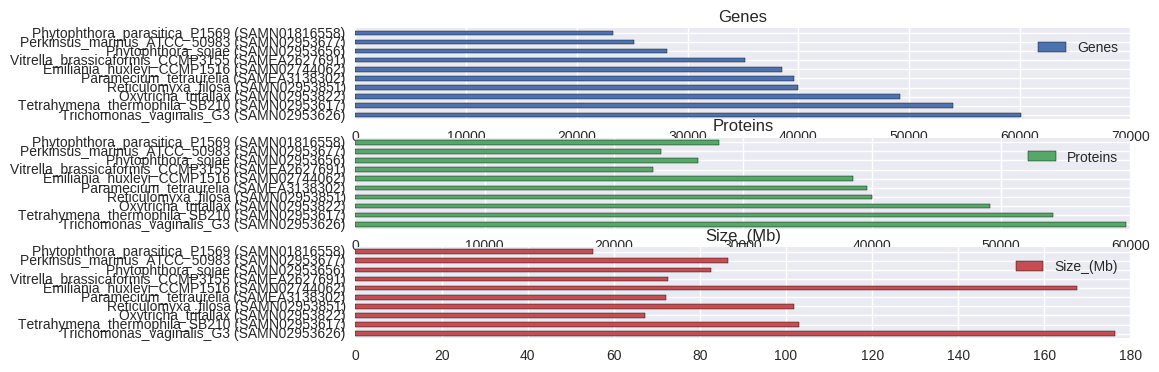

In [24]:
from ipywidgets import Select, IntSlider
# when combined with charting this gets interesting

# set a proper index on the pandas dataframe
euk = pd.read_csv("eukaryotes.tsv", sep="\t", na_values=['-'])
euk.index = euk.apply(lambda x : "{} ({})".format(x['Organism/Name'], x['BioSample_Accession']), axis=1)

# now our function will plot the genomes instead of displaying a dataframe
# takes a number of genomes to show, and the name of a subgroup
def show_genomes(count, subgroup):
    plt.gcf().clear() # clear the plot before drawing a new one
    selected = euk[euk['SubGroup'] == subgroup]
    
    selected.sort_values('Genes', ascending=False)[:count][['Genes', 'Proteins', 'Size_(Mb)']].plot.barh(
        figsize=(10,4), 
        subplots=True,
        sharex=False # try setting this to True and see what happens
    )

subgroup_select = Select(
    options=list(euk['SubGroup'].unique()),
    description='Subgroup'
)

# the count is controlled by a manual integer slider
count_slider = IntSlider(
    min = 2, max=100, value=10, continuous_update=False
)

interact(show_genomes, subgroup=subgroup_select, count=count_slider)

<function __main__.plot_size_proteins>

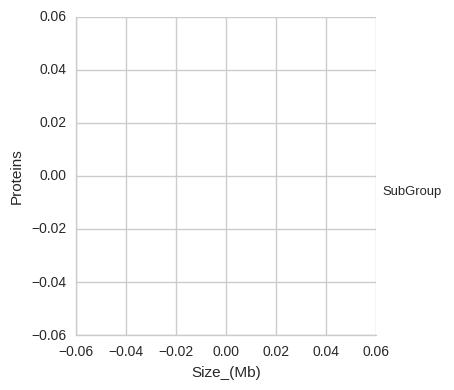

In [25]:
# another example with seaborn
sns.set_style("whitegrid")

# this function will take a list of subgroups
# select rows belonging to them
# and plot size vs. number of predicted proteins
def plot_size_proteins(subgroups):
    sns.lmplot(
        data=euk[euk['SubGroup'].isin(subgroups)], 
        x='Size_(Mb)', 
        y='Proteins', 
        size=4, 
        hue='SubGroup') # use hue to set colour column

# for this we want just one widget, a multiple selection
subgroup_select = SelectMultiple(
    options=list(euk['SubGroup'].unique()),
    description='Subgroups'
    )

interact(plot_size_proteins, subgroups=subgroup_select)

In [26]:
# a blobtools-like example with taxonomically-annotated contig data
import numpy as np
con=pd.read_csv('contigs.csv')

# make a log coverage column
con['log_coverage'] = con.apply(lambda x : np.log10(x['coverage']), axis=1)
con.head()

/home/martin/.virtualenvs/datavis/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log10


,name,length,GC,coverage,phylum,log_coverage
0,scaffold1_size1534183,1534183,0.4304,0.603315,Bacteroidetes,-0.219456
1,scaffold2_size1255804,1255804,0.4237,1.266944,Bacteroidetes,0.102757
2,scaffold3_size1208507,1208507,0.5007,0.364660,Armatimonadetes,-0.438112
3,scaffold4_size1204010,1204010,0.4281,0.499764,Bacteroidetes,-0.301235
4,scaffold5_size1189196,1189196,0.4942,0.320681,Proteobacteria,-0.493927


/home/martin/.virtualenvs/datavis/lib/python3.5/site-packages/ipykernel/__main__.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<function __main__.draw_plot>

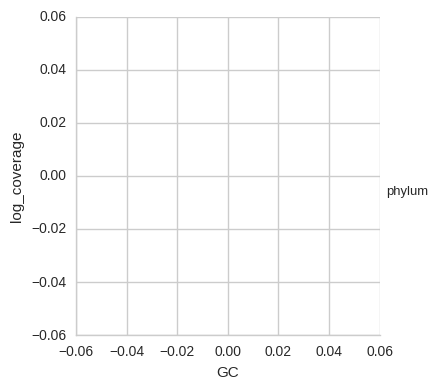

In [27]:
from ipywidgets import Dropdown

# a function which draws a scatter plot of GC vs log coverage
# filtered by which phylum the contig (presumably) comes from 
# and also filtered by minimum contig size
# it also samples a fraction of the total contigs for plotting
def draw_plot(phyla, min_size, frac):
    con_sample = con.sample(frac=frac)
    sns.lmplot(
        
        data = con_sample[(con_sample['phylum'].isin(phyla)) & (con['length'] > min_size)],
        x = 'GC',
        y = 'log_coverage',
        hue='phylum',
        fit_reg=False,
        size=4
    )

phylum_select = SelectMultiple(
    options=list(con.groupby('phylum').size().sort_values(ascending=False).index),
    description='phyla'
    )

min_size_slider = IntSlider(
    min = 1000,
    max = 100000,
    continuous_update=False,
    description = 'min contig length'
)

sample_select = Dropdown(
    options = [1, 0.5, 0.2, 0.1],
    description = 'sample fraction'
)

interact(draw_plot, phyla=phylum_select, min_size=min_size_slider, frac=sample_select)

<function __main__.plot_heatmap>

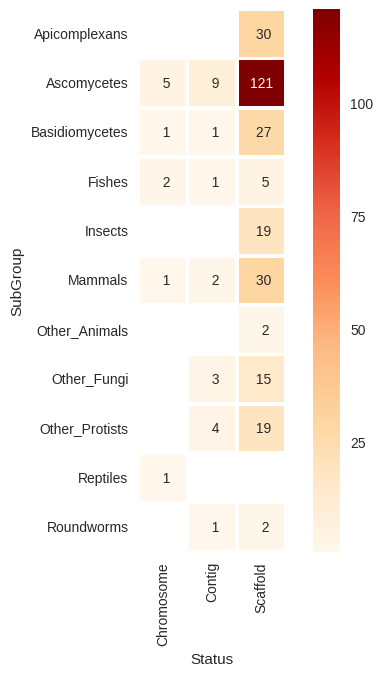

In [61]:
# one more with the eukaryotic genomes data

# function to plot a heatmap showing number of genomes for each group and completion status
# filtered by sequencing center
def plot_heatmap(center):
    plt.figure(figsize=(7,7))

    # add some spaces and change the colour map
    # see here http://chrisalbon.com/python/seaborn_color_palettes.html for colour maps
    size_v_status = euk[euk['Center'] == center].groupby(['SubGroup', 'Status']).size().unstack()
    sns.heatmap(size_v_status, square=True, linewidths=2, cmap='OrRd', annot=True, fmt="3.0f")
    
interact(plot_heatmap, center=list(euk.groupby('Center').size().sort_values(ascending=False).index))

In [109]:
import folium
from folium import plugins

# shall we do one with maps?
# using distribution of Anopheles gambiae from here
# http://lifemapper.org/species/Anopheles%20gambiae

# read the csv file into a dataframe
ano = pd.read_csv('ag.csv')

# function to draw a map showing specimens between two years
def draw_map(target_year):
    
    # make a map centered on Africa
    map_osm = folium.Map(location=[-10, -0], zoom_start=3)
    
    
    # use pandas to grab the rows between the two target years
    selected = ano[(ano['year'] >= target_year[0]) & (ano['year'] <= target_year[1])]
    
    # make a list of (lat, long) tuples
    locations = zip(list(selected['dec_lat']), list(selected['dec_long']))

    # pass the list to folium and ask it to make a heatmap
    map_osm.add_children(folium.plugins.HeatMap(locations))
    return map_osm

# call it like this

draw_map((1970, 1979))

In [110]:
# now make it interactive by adding a slider for the year range
years_slider = IntRangeSlider(
    min=1967, 
    max=1998, 
    description='years', 
    continuous_update=False)

interact(draw_map, target_year=years_slider)

<function __main__.draw_map>

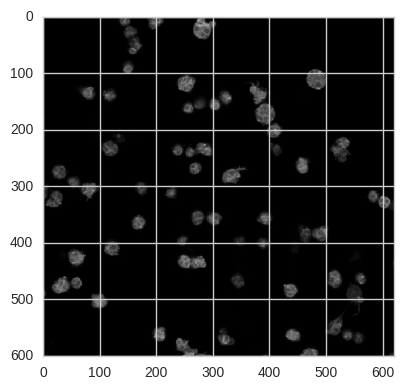

In [84]:
# and one with images
# load an image of cells under a microscope that I found on the internet
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import io
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb, rgb2gray
from skimage.viewer import ImageViewer


image = rgb2gray(io.imread('cells.png'))
io.imshow(image)

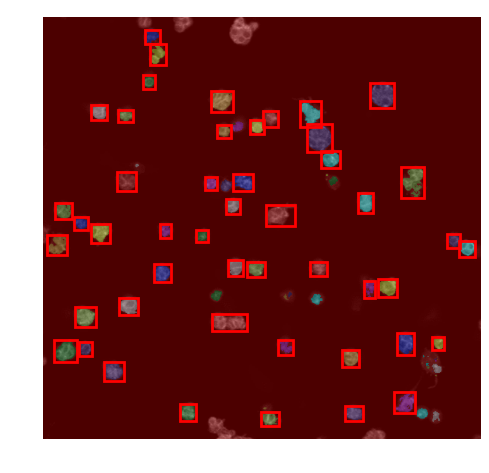

In [87]:
# use this example from the scikit-image tutorial to detect and label cells
# create a slider to control minimum size of areas detected
def find_shapes(min_size):
    # apply threshold
    thresh = threshold_otsu(image)

    bw = closing(image > thresh, square(1))

    # remove artifacts connected to image border
    cleared = clear_border(bw)

    # label image regions
    label_image = label(cleared)
    image_label_overlay = label2rgb(label_image, image=image)

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(image_label_overlay)

    for region in regionprops(label_image):
        # take regions with large enough areas
        if region.area >= min_size:
            # draw rectangle around segmented coins
            minr, minc, maxr, maxc = region.bbox
            rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                      fill=False, edgecolor='red', linewidth=2)
            ax.add_patch(rect)

    ax.set_axis_off()
    plt.tight_layout()
    plt.show()
 
# we can call the function thus:
find_shapes(200)

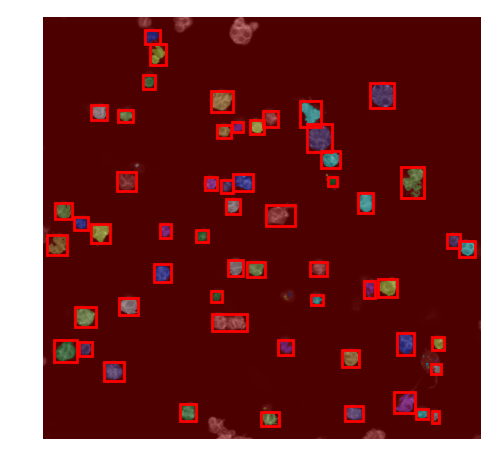

<function __main__.find_shapes>

In [88]:
# now to make it interactive we just add a slider for the minimum feature size

min_size_slider = IntSlider(min=50, max=1000, continous_update=False)
    
interact(find_shapes, min_size=min_size_slider)

## Other stuff not mentioned

- more widget types, date picker, colour picker, boolean types, strings, radio buttons
- widgets to play/pause/rewind animations
- there's a whole layout system which seems to work kind of like css
- css styles for colour, size, text, etc.
- more event handling stuff


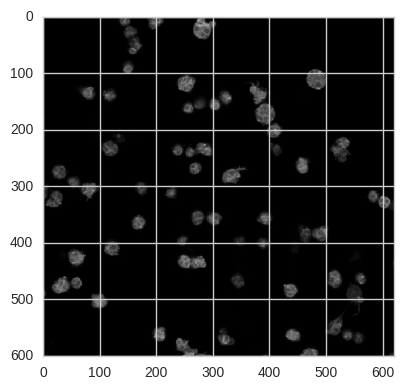

In [73]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import io
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb, rgb2gray
from skimage.viewer import ImageViewer


image = rgb2gray(io.imread('cells.png'))
io.imshow(image)

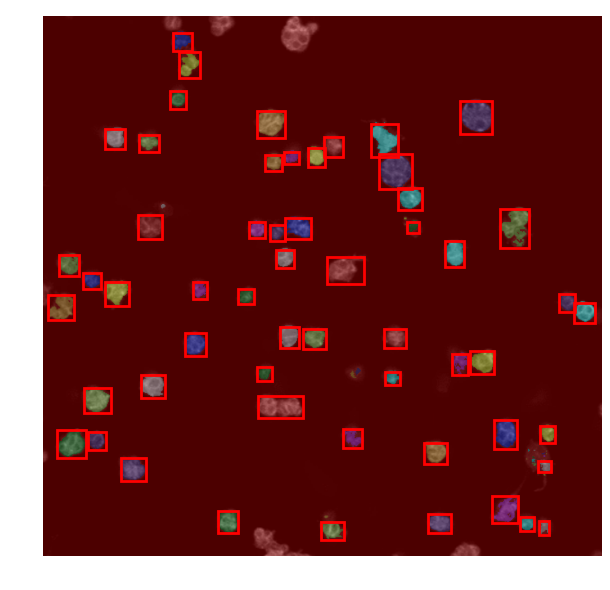

<function __main__.find_shapes>

In [82]:
def find_shapes(min_size):
    # apply threshold
    thresh = threshold_otsu(image)

    bw = closing(image > thresh, square(1))

    # remove artifacts connected to image border
    cleared = clear_border(bw)

    # label image regions
    label_image = label(cleared)
    image_label_overlay = label2rgb(label_image, image=image)

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(image_label_overlay)

    for region in regionprops(label_image):
        # take regions with large enough areas
        if region.area >= min_size:
            # draw rectangle around segmented coins
            minr, minc, maxr, maxc = region.bbox
            rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                      fill=False, edgecolor='red', linewidth=2)
            ax.add_patch(rect)

    ax.set_axis_off()
    plt.tight_layout()
    plt.show()
    
min_size_slider = IntSlider(min=50, max=1000, continous_update=False)
    
interact(find_shapes, min_size=min_size_slider)